## Plotting word frequencies

In [31]:
import requests
from nltk import FreqDist
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHAMBHAVVISEN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Download text of 'Alice in Wonderland' ebook from https://www.gutenberg.org/

In [3]:
url = "https://www.gutenberg.org/files/11/11-0.txt"
alice = requests.get(url)
print(alice.text)

*** START OF THE PROJECT GUTENBERG EBOOK 11 ***

[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III.   A Caucus-Race and a Long Tale
 CHAPTER IV.    The Rabbit Sends in a Little Bill
 CHAPTER V.     Advice from a Caterpillar
 CHAPTER VI.    Pig and Pepper
 CHAPTER VII.   A Mad Tea-Party
 CHAPTER VIII.  The Queen’s Croquet-Ground
 CHAPTER IX.    The Mock Turtle’s Story
 CHAPTER X.     The Lobster Quadrille
 CHAPTER XI.    Who Stole the Tarts?
 CHAPTER XII.   Alice’s Evidence




CHAPTER I.
Down the Rabbit-Hole


Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, “and what is the use of a book,” thought Alice
“without pictures or conversations?”

So she was considering in her

Define a function to plot word frequencies

In [26]:
def plot_word_frequency(words, top_n=10):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plot = sns.barplot(x=labels, y=counts)
    plot.axis
    return plot
word_freq = FreqDist(alice_words)
word_freq

FreqDist({'the': 1515, 'and': 717, 'to': 706, 'a': 611, 'of': 493, 'she': 485, 'said': 416, 'it': 347, 'in': 346, 'was': 327, ...})

Plot words frequencies present in the gutenberg corpus 

<Axes: >

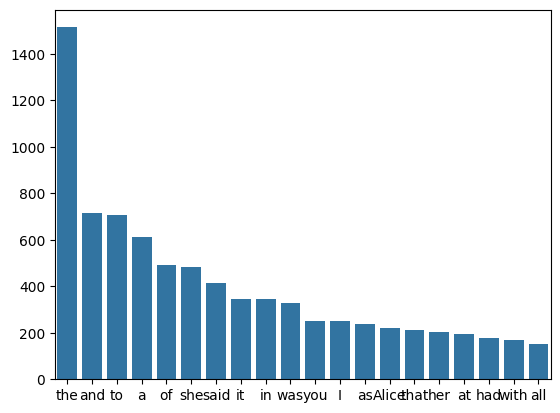

In [27]:
alice_words = alice.text.split()
plot_word_frequency(alice_words, 20)

## Stopwords

Import stopwords from nltk

In [28]:
from nltk.corpus import stopwords

Look at the list of stopwords

In [32]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Let's remove stopwords from the following piece of text.

In [39]:
sample_text = "the great aim of education is not knowledge but action"

Break text into words

In [40]:
sample_words = sample_text.split()
print(sample_words)
[word for word in sample_words if word in stopwords.words('english')]

['the', 'great', 'aim', 'of', 'education', 'is', 'not', 'knowledge', 'but', 'action']


['the', 'of', 'is', 'not', 'but']

Remove stopwords

In [41]:
sample_words = [word for word in sample_words if word not in stopwords.words('english')]
print(sample_words)


['great', 'aim', 'education', 'knowledge', 'action']


Join words back to sentence

In [42]:
sample_text = " ".join(sample_words)
print(sample_text)

great aim education knowledge action


## Removing stopwords in the genesis corpus

In [43]:
no_stops = [word for word in alice_words if word not in stopwords.words("english")]

<Axes: >

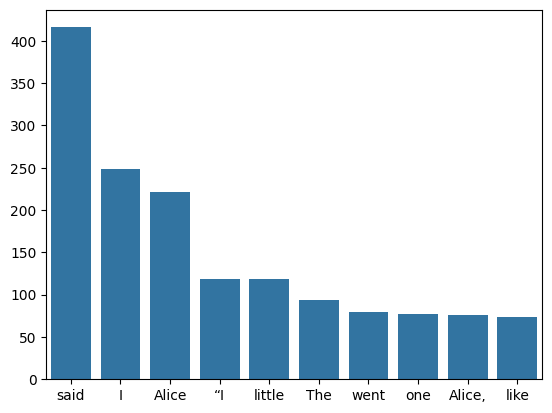

In [44]:
plot_word_frequency(no_stops, 10)

Some other things that can be done
* Need to change tokens to lower case
* Need to get rid of punctuations

All the preprocessing steps will be covered while creating the classifier

In [49]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import ast, sys
sentence = "Education is the most powerful weapon that you can use to change the world"

# change sentence to lowercase
sentence = sentence.lower()

# tokenise sentence into words
words = word_tokenize(sentence)

# extract nltk stop word list
stopwords = stopwords.words('english')

# remove stop words
no_stops =[word for word in words if word not in stopwords]

# print length - don't change the following piece of code
print(len(no_stops))

6
